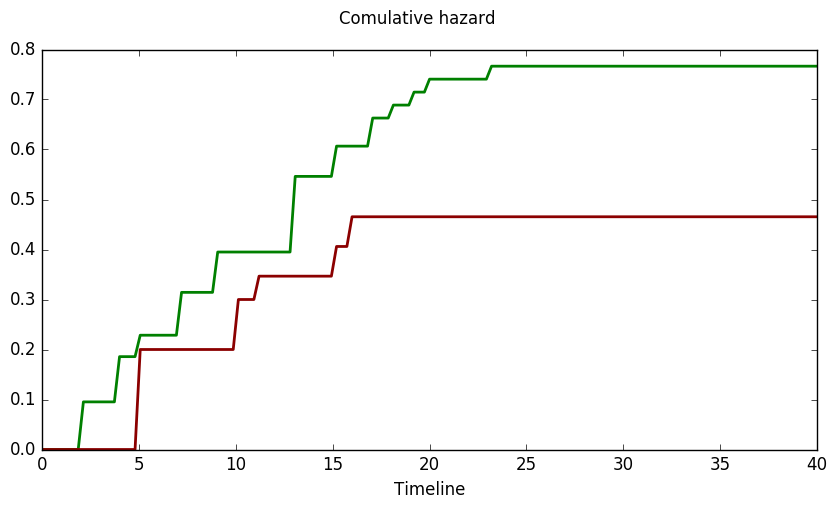

PyObject <matplotlib.text.Text object at 0x7f88aa0bc3d0>

In [46]:
using RandomForest
using PyPlot
using RDatasets:dataset

plt = PyPlot;

gehan = dataset("MASS", "gehan")

time=Array(gehan[2])
event=Array(gehan[3])
treatment=Array(gehan[4])

#Sort time
sortedIndeces=unique(map(i->find(x->x==i,time), sort(time)))
indeces=[]
for key in sortedIndeces
    for element in key
        push!(indeces,element)
    end
end

time=sort(time)
event=event[indeces]
treatment=treatment[indeces]

treatmentType=treatment.=="control"

surv_1 = treeSurvival()
surv_2 = treeSurvival()

#Fit survival models with different treatment types:
fit!(surv_1, time[treatmentType], event[treatmentType])
y_1=predict(surv_1,hcat([0:(40/150):40...]))

fit!(surv_2, time[!treatmentType], event[!treatmentType])
y_2=predict(surv_2,hcat([0:(40/150):40...]))


# Plot the results
fig = figure(figsize=(10,5))
plt.plot([0:(40/150):40...], y_1, label="With treatment",c="green", linewidth=2)
plt.plot([0:(40/150):40...], y_2, label="Without treatment", c="darkred", linewidth=2 )
plt.xlabel("Timeline");
plt.suptitle("Comulative hazard")


-------------------------------------

In [4]:
using RandomForest
using PyPlot
using RDatasets:dataset

plt = PyPlot;

gehan = dataset("MASS", "gehan")

time=Array(gehan[2])
event=Array(gehan[3])
treatment=Array(gehan[4])

#Sort time
sortedIndeces=unique(map(i->find(x->x==i,time), sort(time)))
indeces=[]
for key in sortedIndeces
    for element in key
        push!(indeces,element)
    end
end

time=sort(time)
event=event[indeces]
treatment=treatment[indeces]

treatmentType=treatment.=="control"

surv_1 = treeSurvival()

#Fit survival model
fit!(surv_1, time, event)

results = evaluate_method(method=forest())

r1=results["predictions"]

len=length(r1)
y=zeros(len)
conf1=zeros(Array(Float64,len,2))

for i=1:len
    y[i]=r1[i][1]
    conf1[i,1],conf1[i,2]=y[i]-r1[i][2][1],r1[i][2][2]-y[i]
end

Running experiment
Completed experiment

Survival results
	   MSE	  Corr	 AvMSE	VarMSE	DEOMSE	AEEMSE	 Valid	Region	  Size	 NoIrr	  Time

	0.4446	   NaN	0.4465	0.0019	0.0061	0.0894	  0.95	 1.991	 100.0	 100.0	0.0536

Method

	learningType = RandomForest.Survival()
	modeltype = forest
	notrees = 100
	minleaf = 1
	maxdepth = 0
	randsub = all
	randval = true
	splitsample = 0
	bagging = true
	bagsize = 1.0
	modpred = false
	laplace = false
	confidence = 0.95
	conformal = default

Total time: 0.05 s.


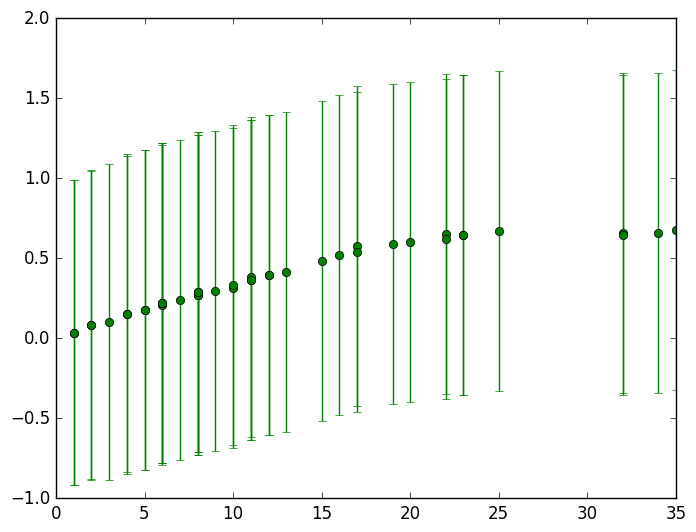

(PyObject <matplotlib.lines.Line2D object at 0x7f0596cbf9d0>,(PyObject <matplotlib.lines.Line2D object at 0x7f0596cbf1d0>,PyObject <matplotlib.lines.Line2D object at 0x7f0596cbf2d0>),(PyObject <matplotlib.collections.LineCollection object at 0x7f0596cb3210>,))

In [5]:
#Plot predictions with confidence interval
errorbar(time,y,yerr=transpose(conf1), fmt="o",color="green") 